# This file analyzes the final pkl file used for training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
x , y = 10, 10
c_x = []
c_y = []
while x <= 90 and y <= 90:
    c_x.append(x)
    c_y.append(y)
    if x == y:
        x += 20
    else:
        y += 20

print(c_x)
print(c_y)

[10, 30, 30, 50, 50, 70, 70, 90, 90]
[10, 10, 30, 30, 50, 50, 70, 70, 90]


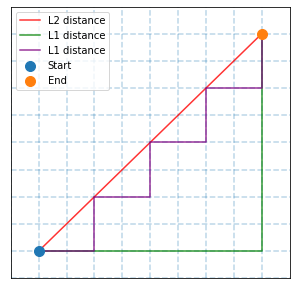

In [3]:
plt.figure(figsize=(5, 5))
x = [10, 10]
y = [90, 90]

for i in [i for i in range(0, 100, 10)]:
    plt.axvline(i, ls='--', alpha=0.3, zorder=-2)
    plt.axhline(i, ls='--', alpha=0.3, zorder=-2)
    
plt.plot([x[0], y[0]], [x[1], y[1]], label="L2 distance", zorder=-1, color='red', alpha=0.8)
plt.plot([x[0], y[0], y[0]], [x[1], x[1], y[1]], label="L1 distance", zorder=-1, color='green', alpha=0.8)
plt.plot(c_x, c_y, label="L1 distance", zorder=-1, color='purple', alpha=0.8)


plt.scatter([x[0]], [x[1]], 100, label="Start")
plt.scatter([y[0]], [y[1]], 100, label="End")

plt.xlim([0, 100])
plt.ylim([0, 100])

plt.xticks([])
plt.yticks([])

plt.legend()
plt.show()

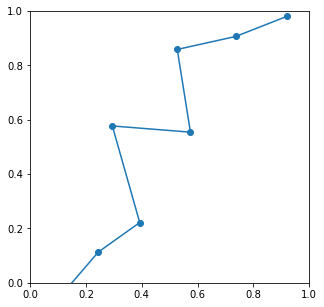

In [4]:
x = list(np.linspace(0.05, 0.95, 8))
noise = [random.random() * 0.4 - 0.2 for _ in x]

y = [i - n for i, n in zip(x, noise)]

x = [i + n for i, n in zip(x, noise)]

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(x, y)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

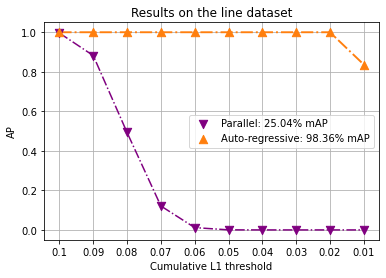

In [5]:
threshold = [round(i, 2) for i in np.linspace(0.01, 0.1, 10)]
threshold = threshold[-1::-1]
threshold = [str(i) for i in threshold]
joint_map = [0.9959, 0.8821, 0.4929, 0.1211, 0.0117, 0.0003, 0., 0., 0., 0.]
cond_map = [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.8365]

plt.plot(threshold, joint_map, '-.', zorder=2, c='purple')
plt.scatter(threshold, joint_map, 70, label="Parallel: %.2f%% mAP" % (25.040), marker='v', c='purple', zorder=3)

plt.plot(threshold, cond_map, '-.', zorder=2, c='#ff7f0e', linewidth=1.9)
plt.scatter(threshold, cond_map, 70, label="Auto-regressive: %.2f%% mAP" % (98.365), marker='^', c='#ff7f0e', zorder=3)

plt.grid(zorder=-5)
plt.legend()
plt.xlabel("Cumulative L1 threshold")
plt.ylabel("AP")
plt.title("Results on the line dataset")
plt.savefig('line_dataset_results.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.1, transparent=True,  dpi=600)
plt.show()

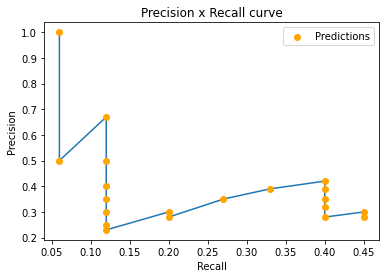

In [6]:
x = [0.06, 0.06, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.2, 0.2, 0.27, 0.33, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.45]
y = [1, 0.5, 0.67, 0.5, 0.4, 0.35, 0.3, 0.25, 0.23, 0.3, 0.28, 0.35, 0.39, 0.42, 0.39, 0.35, 0.32, 0.28, 0.3, 0.28]


plt.scatter(x, y, c='orange', label="Predictions")
plt.plot(x, y, zorder=-1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision x Recall curve")
plt.legend()
plt.show()

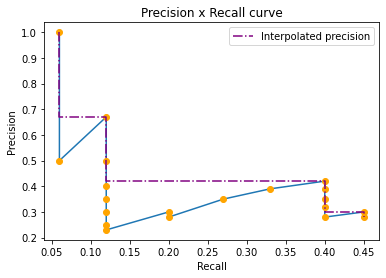

In [7]:
x = [0.06, 0.06, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.2, 0.2, 0.27, 0.33, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.45]
y = [1, 0.5, 0.67, 0.5, 0.4, 0.35, 0.3, 0.25, 0.23, 0.3, 0.28, 0.35, 0.39, 0.42, 0.39, 0.35, 0.32, 0.28, 0.3, 0.28]

m = y[-1]
max_p = [y[-1]]
for el in y[-2::-1]:
    if el > m:
        m = el
    max_p.append(m)
max_p = max_p[-1::-1]

plt.scatter(x, y, c='orange', zorder=-1)
plt.plot(x, y, zorder=-2)
plt.plot(x, max_p, '-.', c='purple', label="Interpolated precision")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision x Recall curve")
plt.legend()
plt.show()

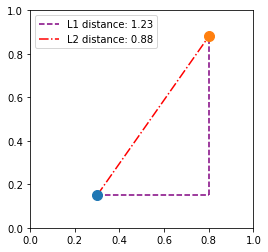

In [8]:
import math
plt.figure(figsize=(4, 4))

p1 = [0.3, 0.15]
p2 = [0.8, 0.88]

l1 = abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])
l2 = math.sqrt(((p1[0]-p2[0])**2) + ((p1[1]-p2[1])**2))

plt.plot([p1[0], p2[0]], [p1[1], p1[1]], '--', c='purple', zorder=-1, label="L1 distance: %.2f" % l1)
plt.plot([p2[0], p2[0]], [p1[1], p2[1]], '--', c='purple', zorder=-1)

plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-.', c='red', zorder=-1, label="L2 distance: %.2f" % l2)

plt.scatter(p1[0], p1[1], 100)
plt.scatter(p2[0], p2[1], 100)
plt.xlim([0, 1])
plt.ylim([0, 1])
# plt.xticks([])
# plt.yticks([])
plt.legend()
plt.show()

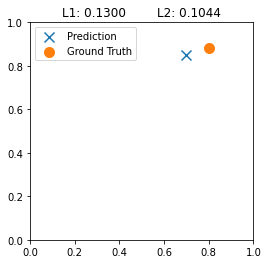

In [9]:
import math
plt.figure(figsize=(4, 4))

p = [0.7, 0.85]
gt = [0.8, 0.88]

l1 = abs(p[0]-gt[0]) + abs(p[1]-gt[1])
l2 = math.sqrt(((p[0]-gt[0])**2) + ((p[1]-gt[1])**2))

plt.scatter(p[0], p[1], 100, marker='x', label="Prediction")
plt.scatter(gt[0], gt[1], 100, label="Ground Truth")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("L1: %.4f        L2: %.4f" % (l1, l2))
# plt.xticks([])
# plt.yticks([])
plt.legend()
plt.show()

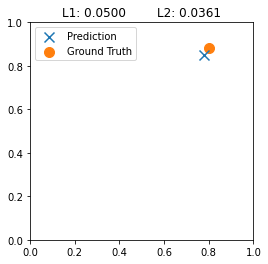

In [10]:
import math
plt.figure(figsize=(4, 4))

p = [0.78, 0.85]
gt = [0.8, 0.88]

l1 = abs(p[0]-gt[0]) + abs(p[1]-gt[1])
l2 = math.sqrt(((p[0]-gt[0])**2) + ((p[1]-gt[1])**2))

plt.scatter(p[0], p[1], 100, marker='x', label="Prediction")
plt.scatter(gt[0], gt[1], 100, label="Ground Truth", zorder=-1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("L1: %.4f        L2: %.4f" % (l1, l2))
# plt.xticks([])
# plt.yticks([])
plt.legend()
plt.show()

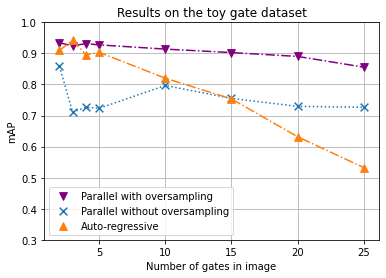

In [11]:
import matplotlib.pyplot as plt

x = [2, 3, 4, 5, 10, 15, 20, 25]
# x = [str(i) for i in x]
detr_no_aux = [85.82, 71.10, 72.64, 72.33, 79.68, 75.52, 72.96, 72.66]
detr_aux = [97.37, 95.05, 93.18, 89.67, 88.05, 85.01, 83.99, 80.266]
detr_oversample = [93.42, 92.47, 93.14, 92.75, 91.39, 90.28, 89.03, 85.58]
autoreg = [90.96, 94.22, 89.53, 90.36, 82.02, 75.36, 63.17, 53.25]

detr_no_aux = [i / 100 for i in detr_no_aux]
detr_aux = [i / 100 for i in detr_aux]
detr_oversample = [i / 100 for i in detr_oversample]
autoreg = [i / 100 for i in autoreg]

plt.scatter(x, detr_oversample, 60, label="Parallel with oversampling", marker='v', color="purple", zorder=2)
plt.plot(x, detr_oversample, '-.', c='purple', zorder=2)

plt.scatter(x, detr_no_aux, 60, marker='x', label="Parallel without oversampling", zorder=2)
plt.plot(x, detr_no_aux, ':', zorder=2)

plt.scatter(x, autoreg, 60, label="Auto-regressive", marker='^', color='#ff7f0e', zorder=2)
plt.plot(x, autoreg, '-.', color='#ff7f0e', zorder=2)

# plt.scatter(x, detr_no_aux, label="Joint without oversampling [no aux]")
# plt.plot(x, detr_no_aux)

plt.grid(zorder=-4)
plt.legend()
plt.ylabel("mAP")
plt.ylim([0.3, 1])
# plt.ylim([0., 1.02])
plt.title("Results on the toy gate dataset")
plt.xlabel("Number of gates in image")
plt.savefig('gates_to_queries_graph.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.1, transparent=True,  dpi=600)
plt.show()

In [109]:
diff = [(a - b) for a, b in zip(detr_oversample, detr_no_aux)]
sum(diff)/len(diff)

0.15668750000000004

## Points evaluated with 1 to $n$ points

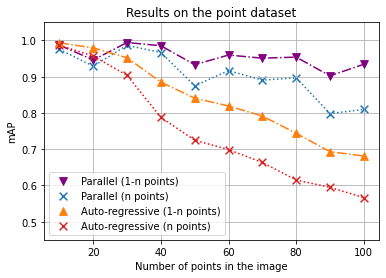

In [12]:
import matplotlib.pyplot as plt

x = [i * 10 for i in range(1, 11)]

joint = [0.98705, 0.94621, 0.99438, 0.98552, 0.93314, 0.95984, 0.95115, 0.95409, 0.9024, 0.93439]
conditional = [0.99342, 0.97957, 0.95233, 0.88517, 0.84083, 0.81933, 0.79152, 0.74403, 0.69320, 0.6812]

joint_max_gates = [0.9755, 0.92897, 0.98663, 0.96682, 0.87495, 0.91677, 0.8906, 0.8969, 0.7984, 0.8096]
cond_max_gates = [0.9869, 0.9569, 0.9038, 0.7879, 0.72479, 0.6989, 0.6635, 0.61502, 0.5948, 0.5663]

# plt.figure(figsize=(7.4, 4.8))
plt.plot(x, joint, '-.', c='purple', zorder=3)
plt.scatter(x, joint, 60, label="Parallel (1-n points)", c='purple', marker='v', zorder=5)

plt.plot(x, joint_max_gates, ':', zorder=3)
plt.scatter(x, joint_max_gates, 60, marker='x', label="Parallel (n points)")

plt.plot(x, conditional, '-.', c='#ff7f0e', zorder=3)
plt.scatter(x, conditional, 60, label="Auto-regressive (1-n points)", c='#ff7f0e', marker='^', zorder=5)

plt.plot(x, cond_max_gates, ':', zorder=3, c='red')
plt.scatter(x, cond_max_gates, 60, marker='x', label="Auto-regressive (n points)", zorder=5, c='tab:red')

plt.grid(zorder=-5)
plt.legend()
plt.ylabel("mAP")
plt.ylim([0.45, 1.05])
plt.xlabel("Number of points in the image")
plt.title("Results on the point dataset")
plt.savefig('points_graph.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.1, transparent=True,  dpi=600)
plt.show()

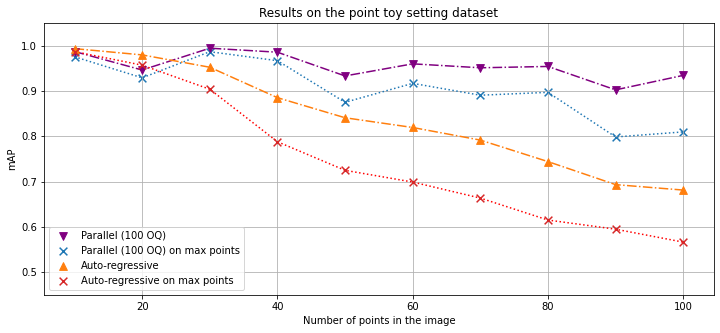

In [9]:
import matplotlib.pyplot as plt

x = [i * 10 for i in range(1, 11)]

joint = [0.98705, 0.94621, 0.99438, 0.98552, 0.93314, 0.95984, 0.95115, 0.95409, 0.9024, 0.93439]
conditional = [0.99342, 0.97957, 0.95233, 0.88517, 0.84083, 0.81933, 0.79152, 0.74403, 0.69320, 0.6812]

joint_max_gates = [0.9755, 0.92897, 0.98663, 0.96682, 0.87495, 0.91677, 0.8906, 0.8969, 0.7984, 0.8096]
cond_max_gates = [0.9869, 0.9569, 0.9038, 0.7879, 0.72479, 0.6989, 0.6635, 0.61502, 0.5948, 0.5663]

plt.figure(figsize=(12, 5))

plt.plot(x, joint, '-.', c='purple', zorder=3)
plt.scatter(x, joint, 60, label="Parallel (100 OQ)", c='purple', marker='v', zorder=5)

plt.plot(x, joint_max_gates, ':', zorder=3)
plt.scatter(x, joint_max_gates, 60, marker='x', label="Parallel (100 OQ) on max points")

plt.plot(x, conditional, '-.', c='#ff7f0e', zorder=3)
plt.scatter(x, conditional, 60, label="Auto-regressive", c='#ff7f0e', marker='^', zorder=5)

plt.plot(x, cond_max_gates, ':', zorder=3, c='red')
plt.scatter(x, cond_max_gates, 60, marker='x', label="Auto-regressive on max points", zorder=5, c='tab:red')

plt.grid(zorder=-5)
plt.legend()
plt.ylabel("mAP")
plt.ylim([0.45, 1.05])
plt.xlabel("Number of points in the image")
plt.title("Results on the point toy setting dataset")
plt.show()

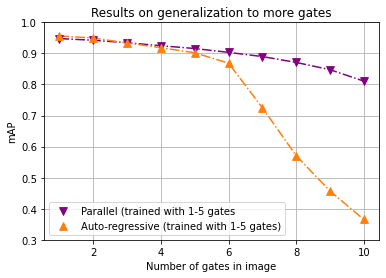

In [13]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 11)]

joint = [94.78,
94.24,
93.45,
92.48,
91.58,
90.34,
88.99,
87.10,
84.77,
81.08
]
conditional = [95.64,
94.94,
93.37,
91.82,
90.21,
86.86,
72.53,
57.08,
45.71,
36.54
]

joint = [i/100 for i in joint]
conditional = [i/100 for i in conditional]

plt.plot(x, joint, '-.', zorder=3, c='purple')
plt.scatter(x, joint, 60, label="Parallel (trained with 1-5 gates", zorder=5, marker='v', c='purple')

plt.plot(x, conditional, '-.', zorder=3, c='#ff7f0e')
plt.scatter(x, conditional, 60, label="Auto-regressive (trained with 1-5 gates)", zorder=5, marker='^', c='#ff7f0e')

plt.grid(zorder=-5)
plt.ylim([0.3, 1])
plt.legend()
plt.ylabel("mAP")
plt.xlabel("Number of gates in image")
plt.title("Results on generalization to more gates")
plt.savefig('generalization.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.1, transparent=True,  dpi=600)
plt.show()

## Evaluation on *points* dataset was conducted using threshold

$L_{1} = |x_{pred} - x_{tgt}| + |y_{pred} - y_{tgt}|$

In [17]:
import math
math.exp(0)

1.0

In [27]:
a = [-3, 4, 5, 6]
ex = [math.exp(i) for i in a]
s = sum(ex)
softmax = [i/s*100 for i in ex]
softmax

[0.008209051661644652, 9.002318251411761, 24.4708381168178, 66.51863458010878]

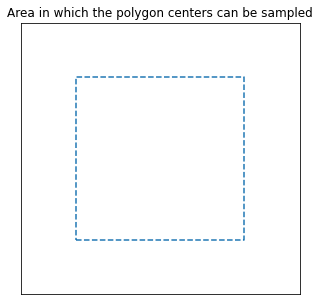

In [12]:
plt.figure(figsize=(5, 5))

x = [.2, .8, .8, .2, .2]
y = [.2, .2, .8, .8, .2]

plt.plot(x, y, '--')

plt.xticks([])
plt.yticks([])
plt.xlim([0, 1])
plt.ylim([0, 1])
# plt.legend()

plt.title("Area in which the polygon centers can be sampled")
plt.show()

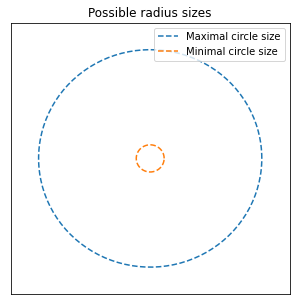

In [22]:
plt.figure(figsize=(5, 5))

alphas = np.linspace(0, 2*math.pi, 200)
x = [0.4 * math.cos(a) + 0.5 for a in alphas]
y = [0.4 * math.sin(a) + 0.5 for a in alphas]

plt.plot(x, y, '--', label="Maximal circle size")

x = [0.05 * math.cos(a) + 0.5 for a in alphas]
y = [0.05 * math.sin(a) + 0.5 for a in alphas]

plt.plot(x, y, '--', label="Minimal circle size")

plt.xticks([])
plt.yticks([])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()

plt.title("Possible radius sizes")
plt.show()

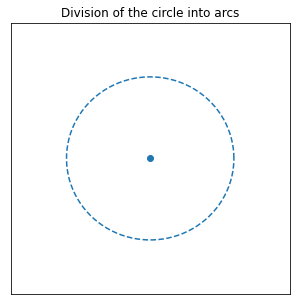

In [30]:
plt.figure(figsize=(5, 5))

alphas = np.linspace(0, 2*math.pi, 200)
x = [0.3 * math.cos(a) + 0.5 for a in alphas]
y = [0.3 * math.sin(a) + 0.5 for a in alphas]

plt.plot(x, y, '--', label="")
plt.scatter([0.5], [0.5])

alphas = np.linspace(0, 2*math.pi, 204)

plt.xticks([])
plt.yticks([])
plt.xlim([0, 1])
plt.ylim([0, 1])
# plt.legend()

plt.title("Division of the circle into arcs")
plt.show()